In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [121]:
df = pd.read_csv('Demo_Data_Loan.csv')

In [122]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [123]:
df.shape

(367, 13)

In [124]:
#removing unnecessary columns
df.drop('Loan_ID',axis=1,inplace=True)

# Data Visualization

In [125]:
#lets check null values

df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan Approved         0
dtype: int64

<AxesSubplot:>

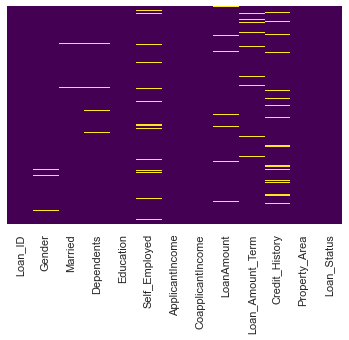

In [126]:
#lets visualize 
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [127]:
#data types of the columns

df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan Approved          int64
dtype: object

In [128]:
#check how many male and female
df.Gender.value_counts(dropna=False)

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64

In [129]:
#check how many self employed
df.Self_Employed.value_counts(dropna=False)

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64

In [130]:
#check eduaction
df.Education.value_counts(dropna=False)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

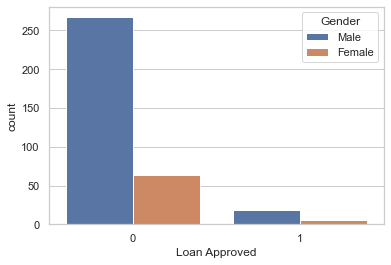

In [131]:
#check loan approval according to gender 

sns.set_style('whitegrid')
sns.countplot(x='Loan Approved', hue='Gender', data=df)

Looks like Male applicants were more in number than Female applicants. And loan approval for male applicants is also more. 

<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

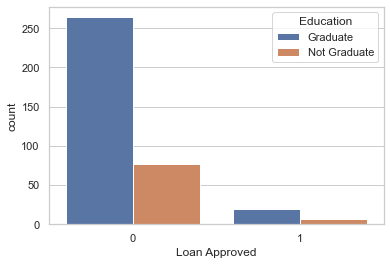

In [132]:
#check loan approval according to education

sns.set_style('whitegrid')
sns.countplot(x='Loan Approved', hue='Education', data=df)

<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

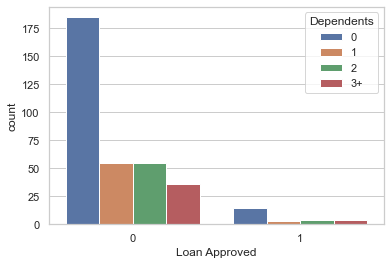

In [133]:
#check loan approval according to dependants

sns.set_style('whitegrid')
sns.countplot(x='Loan Approved', hue='Dependents', data=df)

Looks like the applicants with 0 Dependents is very high. 

<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

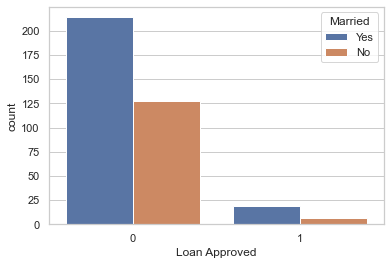

In [134]:
#check loan approval with marriage 

sns.set_style('whitegrid')
sns.countplot(x='Loan Approved', hue='Married', data=df)

 The number of applicants that has been married is higher compared to applicants that hasn't married. The approval was more for both married and unmarried people.

<AxesSubplot:xlabel='Loan Approved', ylabel='count'>

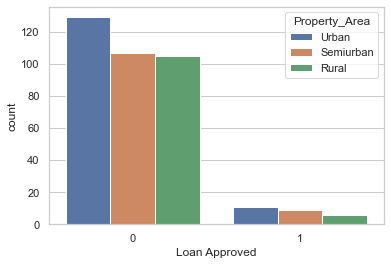

In [135]:
#check loan approval with Property_Area

sns.set_style('whitegrid')
sns.countplot(x='Loan Approved', hue='Property_Area', data=df)

People from urban area are more. But the loan approval is not very differentiated by property area as we can see.

In [136]:
df['Loan Approved'].value_counts()

0    341
1     26
Name: Loan Approved, dtype: int64

We can clearly see that our dataset is imbalanced and we need to resample it

In [137]:
#credit history

df.Credit_History.value_counts(dropna=False)

1.0    279
0.0     59
NaN     29
Name: Credit_History, dtype: int64

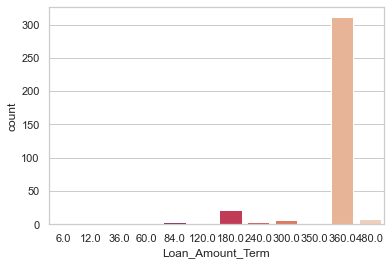

In [138]:
#loan amount term

sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

# Lets checkout outliers

360 days loan amount term is higher than any other term

In [139]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,362.000000
mean,4805.599455,1569.577657,136.132597
std,4910.685399,2334.232099,61.366652
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,100.250000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,158.000000
max,72529.000000,24000.000000,550.000000


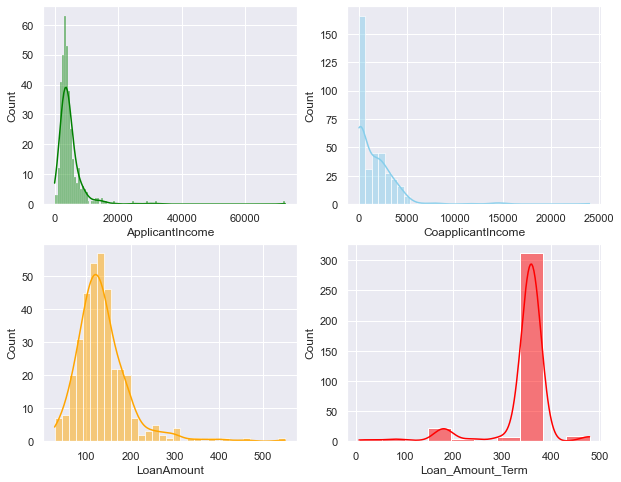

In [140]:
#lets see histogram distribution

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and have outliers. Loan Amount Term is negatively skewed and it has outliers

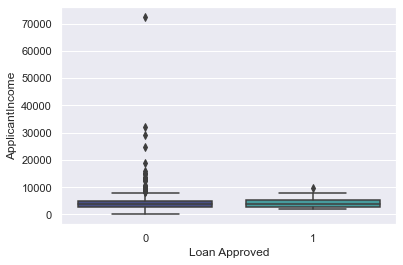

In [141]:
sns.boxplot(x="Loan Approved", y="ApplicantIncome", data=df, palette="mako");

We can see some outliers in Applicant Income

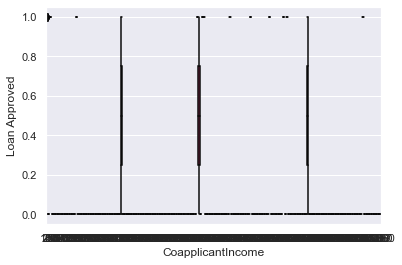

In [142]:
sns.boxplot(x="CoapplicantIncome", y="Loan Approved", data=df, palette="rocket");

Coapplicant Income has outliers

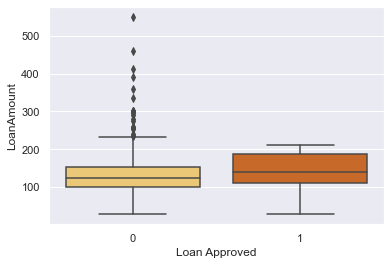

In [143]:
sns.boxplot(x="Loan Approved", y="LoanAmount", data=df, palette="YlOrBr");

Loan amount has also outlier

# Correlation heatmap

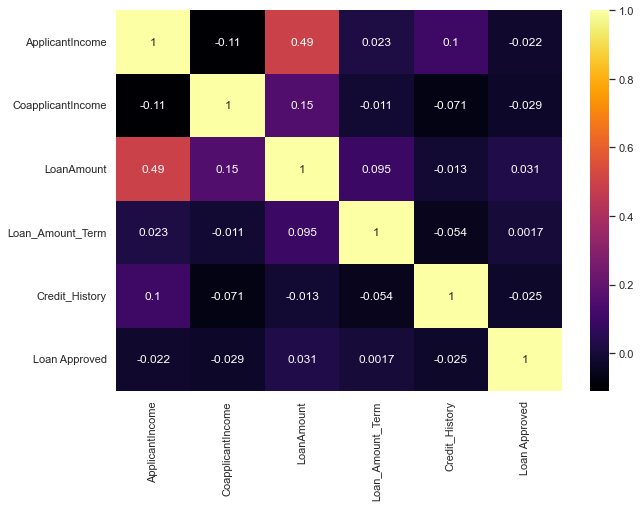

In [144]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

positive correlation between loan amount and application income. Positive corr between loan amount and Coapplicant income. There are no other highly correlated features. We would delete features that are correlated more than 70% or more. As in this dataset, that's not the case, we're not deleting any features.

# Data Preprocessing

In [145]:
#Replacing null values with mode

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [146]:
#replacing numerical null values with mean

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [147]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Approved
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [149]:
df.rename(columns={'Loan Approved':'Loan_Approved'},inplace=True)

In [150]:
#categorical variable one hot encoding
df = pd.get_dummies(df)

In [151]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [152]:
# Drop unnecessary dummy columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed'}
       
df.rename(columns=new, inplace=True)

In [153]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,1,1,0,0,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,1,0,1,0,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,1,0,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,1,0,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1


In [175]:
df.shape

(367, 17)

In [199]:
df1 = df.copy()

# Resampling using SMOTE to balance the dataset

In [200]:
X = df1.drop('Loan_Approved',axis=1)
y = df1['Loan_Approved']

In [201]:
X, y = SMOTE().fit_resample(X, y)

In [202]:
y.value_counts()

0    341
1    341
Name: Loan_Approved, dtype: int64

In [203]:
X.shape

(682, 16)

In [217]:
df2 = pd.concat([X,y],axis=1) 

In [218]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Approved
0,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,0
1,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,0
2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,0
3,2340,2546,100.0,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,0
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0


In [219]:
df2.shape

(682, 17)

# Removing outliers

In [220]:
#Removing outliers using IQR Range
#thanks to this article: https://statisticsbyjim.com/basics/interquartile-range/

Q1 = df2.quantile(0.15)
Q3 = df2.quantile(0.85)
IQR = Q3 - Q1

df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [221]:
df2.shape

(404, 17)

In [222]:
df2['Loan_Approved'].value_counts()

1    253
0    151
Name: Loan_Approved, dtype: int64

In [223]:
#As my ApplicantIncome, CoApplicantIncome and LoanAmount is positively skewed, I'll use square root transformation to normalize

df2.ApplicantIncome = np.sqrt(df2.ApplicantIncome)
df2.CoapplicantIncome = np.sqrt(df2.CoapplicantIncome)
df2.LoanAmount = np.sqrt(df2.LoanAmount)

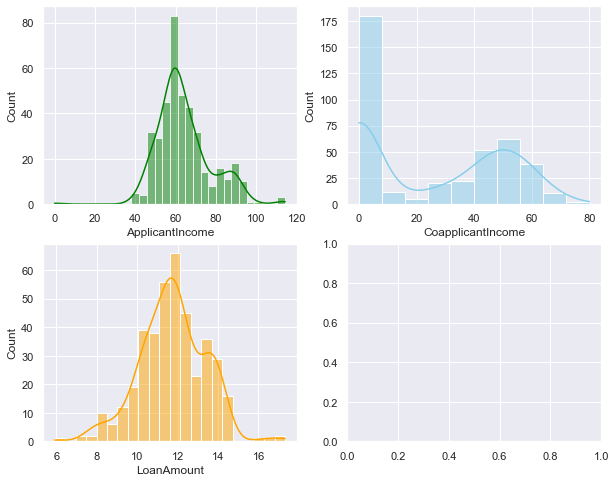

In [224]:
#lets visualize the data again

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df2, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df2, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df2, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


Looks better than before

# Separating features

In [225]:
X = df2.drop('Loan_Approved',axis=1)
y = df2['Loan_Approved']

In [226]:
X.shape

(404, 16)

In [227]:
y.shape

(404,)

In [228]:
y.value_counts()

1    253
0    151
Name: Loan_Approved, dtype: int64

In [229]:
#Normalization/scaling

X = MinMaxScaler().fit_transform(X)

# Train Test Split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Trying out different models

# Logistic Regression

In [231]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.88      0.88      0.88        48

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81

[[27  6]
 [ 6 42]]
LR accuracy: 85.19%


# KNN

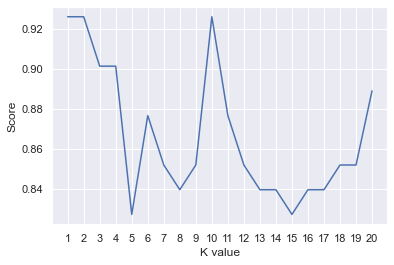

KNN best accuracy: 92.59%


In [232]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [240]:
#knn best parameter

KNclassifier = KNeighborsClassifier(n_neighbors = 10)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNNAcc = accuracy_score(y_pred,y_test)
print('KNN best accuracy: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.94      0.94      0.94        48

    accuracy                           0.93        81
   macro avg       0.92      0.92      0.92        81
weighted avg       0.93      0.93      0.93        81

[[30  3]
 [ 3 45]]
KNN best accuracy: 92.59%


# SVM

In [233]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.88      0.93        48

    accuracy                           0.93        81
   macro avg       0.92      0.94      0.93        81
weighted avg       0.94      0.93      0.93        81

[[33  0]
 [ 6 42]]
SVC accuracy: 92.59%


# Naive Bayes

In [238]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

IndexError: index 1 is out of bounds for axis 1 with size 1

# Decision Tree

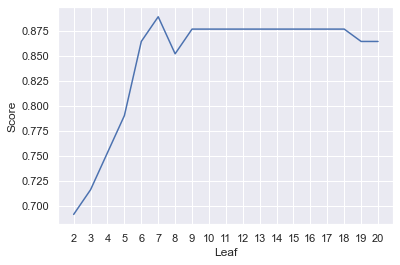

Decision Tree Accuracy: 88.89%


In [236]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [241]:
#DT best parameter

DTclassifier = DecisionTreeClassifier(max_leaf_nodes=7)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       1.00      0.81      0.90        48

    accuracy                           0.89        81
   macro avg       0.89      0.91      0.89        81
weighted avg       0.91      0.89      0.89        81

[[33  0]
 [ 9 39]]
Decision Tree accuracy: 88.89%


# Random Forest

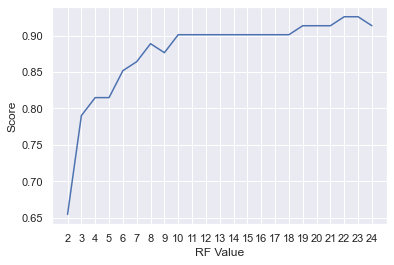

Random Forest Accuracy:  92.59%


In [237]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [239]:
#best parameter RFClassifier

RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=23)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.98      0.90      0.93        48

    accuracy                           0.93        81
   macro avg       0.92      0.93      0.92        81
weighted avg       0.93      0.93      0.93        81

[[32  1]
 [ 5 43]]
Random Forest accuracy: 92.59%


# Got 92.59% for SVM, KNN and Random Forest. Which is really good. But I prefer to use Random Forest Classifier. So, I choose RFClassifier model for production

# Save model

In [242]:
import pickle

In [243]:
with open('RF_model_loan','wb') as file:
    pickle.dump(RFclassifier,file)